# TELCO CUSTOMER CHURN PREDICTION MODEL

In this study, I worked on customer churn prediction using logistic regression.

Churn data is important for the companies. The decision makers could take precautions and maybe offer deals to the customers who would likely to end relationship with the company in the future by understanding the past customers' churn data.

Designing a good classifier model is important to predict the future customers who would end the relationship with the company. While we wouldn't like to miss the customers who would churn, also we wouldn't like to spend exstra resources (contacting the customers, offering discounts or deals) for the customers who wouldn't churn. Deciding the right evaluation metric (accuracy, precision, recall, f1 score) becomes important for these kind of business concerns.  

The important parts of the study are;

a. The target variable labels (churn or not churn) are unbalanced,

b. The difference between the model evaluation metrics (accuracy, precision, recall, f1 score),

c. Deciding which metric to use for this specific application and setting a new threshold for the logistic regression prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

In [2]:
dataset = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = dataset.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA:

**We should understand the dataset before implement a prediction model.**

**Analyzing the customers' basic demography and churn distribution.**

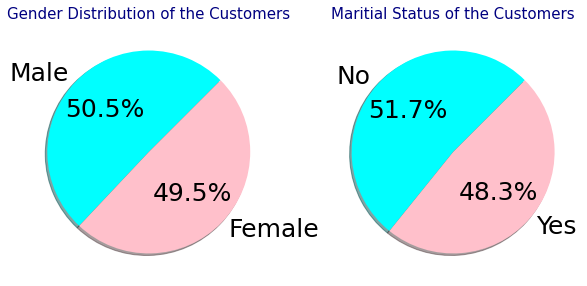

In [4]:
gender_label = df.gender.value_counts().index
gender_size = df.gender.value_counts().values

partner_label = df['Partner'].value_counts().index
partner_size = df['Partner'].value_counts().values

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie(gender_size, labels=gender_label, colors=['cyan', 'pink'], autopct='%1.1f%%', shadow=True, startangle=45, textprops={'fontsize':25})
plt.title('Gender Distribution of the Customers', color='navy', fontsize=15)

plt.subplot(1,2,2)
plt.pie(partner_size, labels=partner_label, colors=['cyan', 'pink'], autopct='%1.1f%%', shadow=True, startangle=45, textprops={'fontsize':25})
plt.title('Maritial Status of the Customers', color='navy', fontsize=15);

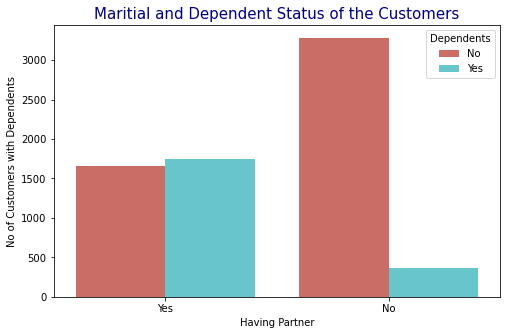

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(df['Partner'], hue=df['Dependents'], palette='hls')
plt.title('Maritial and Dependent Status of the Customers', color='navy', fontsize=15)
plt.xlabel('Having Partner')
plt.ylabel('No of Customers with Dependents');

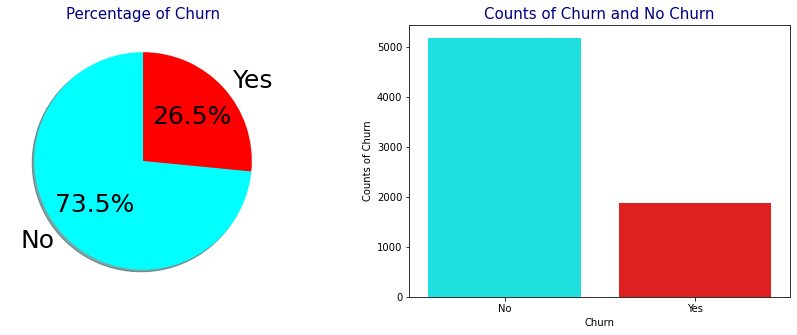

In [6]:
churn_label = df['Churn'].value_counts().index
churn_color = ['cyan', 'red']
churn_size = df['Churn'].value_counts().values

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(churn_size, labels=churn_label, colors=churn_color, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize':25})
plt.title('Percentage of Churn', color='navy', fontsize=15)

plt.subplot(1,2,2)
sns.countplot(df['Churn'], palette={'No':'cyan', 'Yes':'red'})
plt.title('Counts of Churn and No Churn', color='navy', fontsize=15)
plt.ylabel('Counts of Churn');

**We can see that gender and marital status of the customers are balanced.**

**But dependents information and churn distributions are inbalanced in our dataset.**

**Now let's see the monthly and total charges distributions and the customers' loyalty to the company (Tenure: Length of time as months the customers have been a member of the company)**

In [7]:
#'Total Charges' feature should be float but it has an object type. So I will convert it into float type:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[['MonthlyCharges', 'TotalCharges', 'tenure']].describe()

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7032.000000,7043.000000
mean,64.761692,2283.300441,32.371149
std,30.090047,2266.771362,24.559481
min,18.250000,18.800000,0.000000
25%,35.500000,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.850000,3794.737500,55.000000
max,118.750000,8684.800000,72.000000


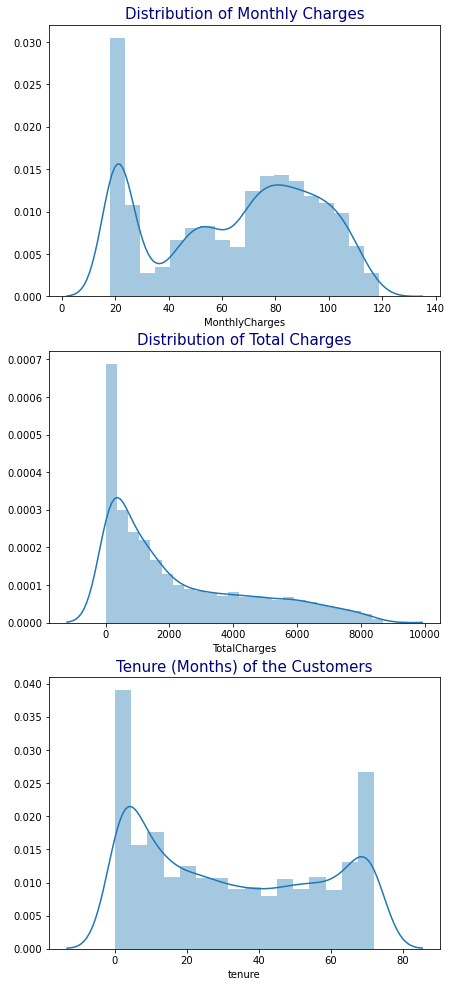

In [8]:
plt.figure(figsize=(7,17))
plt.subplot(3,1,1)
sns.distplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges', color='navy', fontsize=15)

plt.subplot(3,1,2)
sns.distplot(df['TotalCharges'])
plt.title('Distribution of Total Charges', color='navy', fontsize=15)

plt.subplot(3,1,3)
sns.distplot(df['tenure'])
plt.title('Tenure (Months) of the Customers', color='navy', fontsize=15);

**Now we can analyze the contract and internet usage information.**

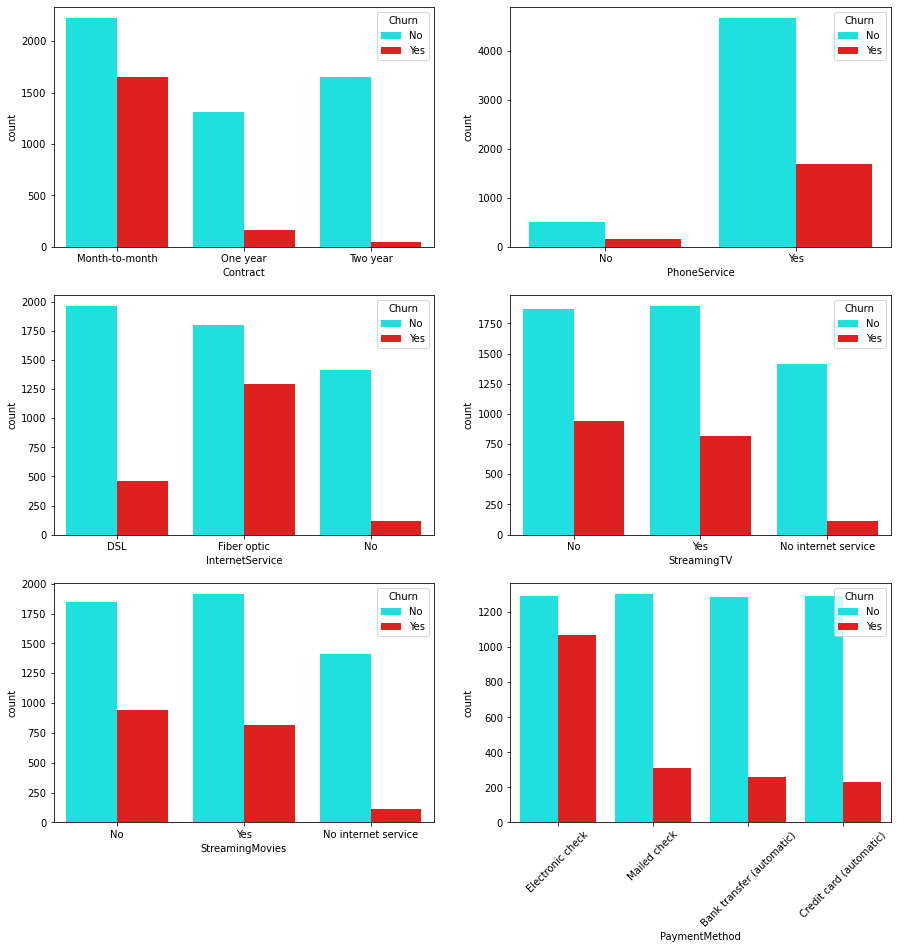

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.countplot(df['Contract'], hue=df['Churn'], palette=['cyan', 'red'])

plt.subplot(3,2,2)
sns.countplot(df['PhoneService'], hue=df['Churn'], palette=['cyan', 'red'])

plt.subplot(3,2,3)
sns.countplot(df['InternetService'], hue=df['Churn'], palette=['cyan', 'red'])

plt.subplot(3,2,4)
sns.countplot(df['StreamingTV'], hue=df['Churn'], palette=['cyan', 'red'])

plt.subplot(3,2,5)
sns.countplot(df['StreamingMovies'], hue=df['Churn'], palette=['cyan', 'red'])

plt.subplot(3,2,6)
sns.countplot(df['PaymentMethod'], hue=df['Churn'], palette=['cyan', 'red'])
plt.xticks(rotation=45);

## Data Preparation and Feature Engineering:
 
**For the binary features I will use Label Encoding and for the others I will use One Hot Encoding method to prepare my features. I could have only use one hot encoding instead, but I wanted to demonstrate how to use label encoder method as well.**

### Label Encoding:

In [10]:
# Label encoding for 'Yes' and 'No' features:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].astype('category')

for each in binary_cols:
    df[each] = encoder.fit_transform(df[each])

### One Hot Encoding:

In [11]:
# Features with multiple values:
print('MultipleLines Values   : ', df['MultipleLines'].unique())
print('Contract Values        : ', df['Contract'].unique())
print('InternetService Values : ', df['InternetService'].unique())
print('PaymentMethod Values   : ', df['PaymentMethod'].unique())
print('OnlineSecurity Values  : ', df['OnlineSecurity'].unique())
print('OnlineBackup Values    : ', df['OnlineBackup'].unique())
print('DeviceProtection Values: ', df['DeviceProtection'].unique())
print('TechSupport Values     : ', df['TechSupport'].unique())
print('StreamingTV Values     : ', df['TechSupport'].unique())
print('StreamingMovies Values : ', df['TechSupport'].unique())

MultipleLines Values   :  ['No phone service' 'No' 'Yes']
Contract Values        :  ['Month-to-month' 'One year' 'Two year']
InternetService Values :  ['DSL' 'Fiber optic' 'No']
PaymentMethod Values   :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
OnlineSecurity Values  :  ['No' 'Yes' 'No internet service']
OnlineBackup Values    :  ['Yes' 'No' 'No internet service']
DeviceProtection Values:  ['No' 'Yes' 'No internet service']
TechSupport Values     :  ['No' 'Yes' 'No internet service']
StreamingTV Values     :  ['No' 'Yes' 'No internet service']
StreamingMovies Values :  ['No' 'Yes' 'No internet service']


In [12]:
cols_for_dummies = ['MultipleLines', 'Contract', 'InternetService', 
                    'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_ = df.drop(cols_for_dummies, axis=1)
dms = pd.get_dummies(df[cols_for_dummies])
df = pd.concat([df_, dms], axis=1)

**Converting all the column names into lowercase.**

In [13]:
df.columns = df.columns.str.lower()

**Are there any null values?**

In [14]:
df.isnull().sum()

customerid                                  0
gender                                      0
seniorcitizen                               0
partner                                     0
dependents                                  0
tenure                                      0
phoneservice                                0
paperlessbilling                            0
monthlycharges                              0
totalcharges                               11
churn                                       0
multiplelines_no                            0
multiplelines_no phone service              0
multiplelines_yes                           0
contract_month-to-month                     0
contract_one year                           0
contract_two year                           0
internetservice_dsl                         0
internetservice_fiber optic                 0
internetservice_no                          0
paymentmethod_bank transfer (automatic)     0
paymentmethod_credit card (automat

**There aren't a lot of null values. So I decided to delete 11 customer datapoints with the null values. And I want to delete Customer IDs as well because it is not related with my predictions.**

In [15]:
df.dropna(inplace=True)
df = df.drop('customerid', axis=1)

**Now it is time for scaling the 'tenure', 'monthly charges', and 'total charges' features.**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['tenure', 'monthlycharges', 'totalcharges']] = scaler.fit_transform(df[['tenure', 'monthlycharges', 'totalcharges']])

**The final dataset:**

In [17]:
df.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,multiplelines_no,multiplelines_no phone service,multiplelines_yes,contract_month-to-month,contract_one year,contract_two year,internetservice_dsl,internetservice_fiber optic,internetservice_no,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,onlinesecurity_no,onlinesecurity_no internet service,onlinesecurity_yes,onlinebackup_no,onlinebackup_no internet service,onlinebackup_yes,deviceprotection_no,deviceprotection_no internet service,deviceprotection_yes,techsupport_no,techsupport_no internet service,techsupport_yes,streamingtv_no,streamingtv_no internet service,streamingtv_yes,streamingmovies_no,streamingmovies_no internet service,streamingmovies_yes
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5,0,0,0,0,0.098592,1,1,0.809950,0.092511,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
6,1,0,0,1,0.295775,1,1,0.704975,0.222779,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
7,0,0,0,0,0.126761,0,0,0.114428,0.032668,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8,0,0,1,0,0.380282,1,1,0.861194,0.349325,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
9,1,0,0,1,0.859155,1,0,0.377114,0.400317,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


**Let's see our features' correlation with the churn data. But I want to see only the features with 0.20 (and -0.20) or higher correlation because otherwise the graph becomes really crowded.**

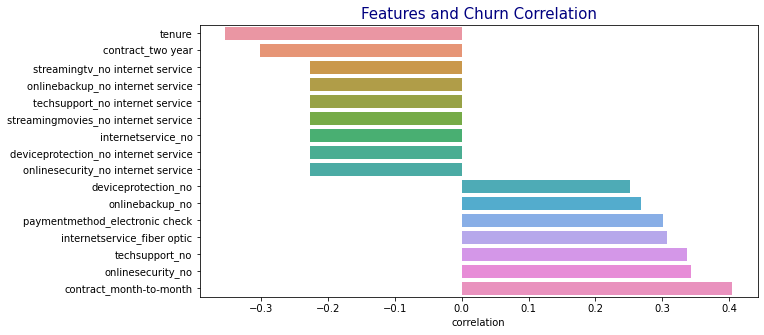

In [18]:
corrmatrix = pd.DataFrame(df.corr()['churn'].sort_values(ascending=True)).rename(columns={'churn':'correlation'})

stronger_corr = corrmatrix[(corrmatrix.correlation > 0.20) | (corrmatrix.correlation < -0.20)].drop('churn')

plt.figure(figsize=(10,5))
sns.barplot(x=stronger_corr.correlation, y=stronger_corr.index)
plt.title('Features and Churn Correlation', color='navy', fontsize=15);

**From the correlation matrix according to the churn data, we can have some insights for the business actions.**

**We can see from above,** 

* The customers who have a longer membership (tenure and two year contract) and who doesn't use internet services are less likely to churn.

* The customers who have month to month contracts and who don't have online security, tech support, online backup services are more likely to churn.

* So the client should convince the customers to increase their contract time and support customers to purchase technical support and backup services.

## Train and Test Split

**Before separeting the dataset into train and test, I need to separete target column from the other features.**

In [19]:
y = df['churn']
X = df.drop('churn', axis=1)

**Splitting the dataset into train and test.**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape  : ', X_test.shape)
print('y_test shape  : ', y_test.shape)

X_train shape :  (5625, 40)
y_train shape :  (5625,)
X_test shape  :  (1407, 40)
y_test shape  :  (1407,)


## Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

loj = LogisticRegression(solver='liblinear')

loj_model = loj.fit(X_train, y_train)

y_pred = loj_model.predict(X_test)
y_pred_prob = loj_model.predict_proba(X_test)

**Prediction of our default model:**

In [22]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

**Predictions with the probabilities:**

**The first column is the probability of predicting 0 (no churn) and the second column is the probability of predicting 1 (churn).**

In [23]:
y_pred_prob

array([[0.99658471, 0.00341529],
       [0.31865572, 0.68134428],
       [0.92564372, 0.07435628],
       ...,
       [0.92753375, 0.07246625],
       [0.93815314, 0.06184686],
       [0.81555058, 0.18444942]])

**Let's evaluate our default logistic regression model:**

**Accuracy is the percent of predictions that are correct. Accuracy is not a good choice for unbalanced datasets like this one.**

**Precision = TP / TP + FP**

**Recall = TP / TP + FN**

**Precision is interested in the predicted positives.**

**Recall is interested in the actual positives.**

**Precision is sureness while recall is sensitivity.**

**With a high value for a precision treshold, the model will need higher proof to accept for a prediction. So there would be some false negatives (Predicted as no churn, but actually churn).**

**With a high value for a recall the model will be more willing to accept a prediction with less proof. So there would be some false positives (Predicted as churn, but actually no churn).**

**F1 score = 2 * (precision * recall) / (precision + recall)**

**F1 score is the harmonic mean of the precision and the recall. It is a balanced value between precision and recall.**

**Let's see our default model's performance which has 0.5 as the treshold.**

Accuracy of the default model  : 0.80
Precision of the default model : 0.63
Recall of the default model    : 0.54
F1 Score of the default model  : 0.58


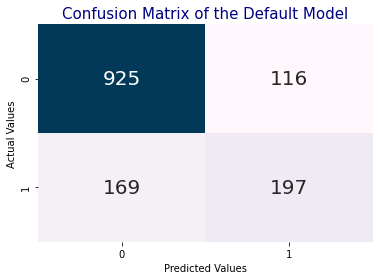

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

print('Accuracy of the default model  : %.2f' % accuracy_score(y_test, y_pred))
print('Precision of the default model : %.2f' % precision_score(y_test, y_pred))
print('Recall of the default model    : %.2f' % recall_score(y_test, y_pred))
print('F1 Score of the default model  : %.2f' % f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.title('Confusion Matrix of the Default Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

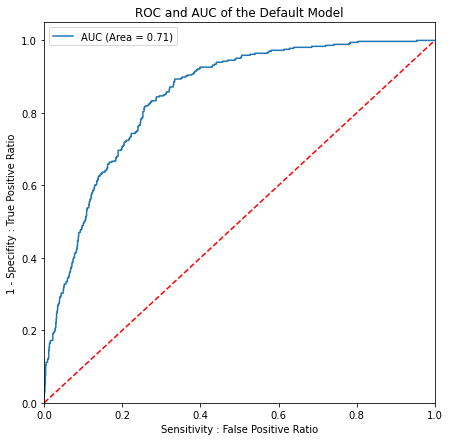

In [25]:
logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='AUC (Area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity : False Positive Ratio')
plt.ylabel('1 - Specifity : True Positive Ratio')
plt.title('ROC and AUC of the Default Model')
plt.legend()
plt.show()

**I am not so happy with my default model. Because 169 customers have churned, but we didn't predict that they are going to churn. We would loose those 169 customers if our company don't act because of following our model's prediction.**

**And there are 116 customers who wouldn't churn, but the company might have acted and spent it's resources.**

**For this study, I would act to decrease those 169 customers. That means I want my model to be more sensitive for predictions. So I am going to decrease my threshold from it's default number 0.5 to something like 0.4 or 0.3.**

In [26]:
# New predictions with 0.4 threshold:
y_pred_4 = loj_model.predict_proba(X_test)[:,1] >= 0.4

# New predictions with 0.3 threshold:
y_pred_3 = loj_model.predict_proba(X_test)[:,1] >= 0.3

In [27]:
print('Accuracy of the default model             : %.2f' % accuracy_score(y_test, y_pred))
print('Precision of the default model            : %.2f' % precision_score(y_test, y_pred))
print('Recall of the default model               : %.2f' % recall_score(y_test, y_pred))
print('F1 Score of the default model             : %.2f' % f1_score(y_test, y_pred))
print('--'*24)
print('Accuracy of the model with 0.4 threshold  : %.2f' % accuracy_score(y_test, y_pred_4))
print('Precision of the model with 0.4 threshold : %.2f' % precision_score(y_test, y_pred_4))
print('Recall of the model with 0.4 threshold    : %.2f' % recall_score(y_test, y_pred_4))
print('F1 Score of the model with 0.4 threshold  : %.2f' % f1_score(y_test, y_pred_4))
print('--'*24)
print('Accuracy of the model with 0.3 threshold  : %.2f' % accuracy_score(y_test, y_pred_3))
print('Precision of the model with 0.3 threshold : %.2f' % precision_score(y_test, y_pred_3))
print('Recall of the model with 0.3 threshold    : %.2f' % recall_score(y_test, y_pred_3))
print('F1 Score of the model with 0.3 threshold  : %.2f' % f1_score(y_test, y_pred_3))

Accuracy of the default model             : 0.80
Precision of the default model            : 0.63
Recall of the default model               : 0.54
F1 Score of the default model             : 0.58
------------------------------------------------
Accuracy of the model with 0.4 threshold  : 0.79
Precision of the model with 0.4 threshold : 0.58
Recall of the model with 0.4 threshold    : 0.66
F1 Score of the model with 0.4 threshold  : 0.62
------------------------------------------------
Accuracy of the model with 0.3 threshold  : 0.76
Precision of the model with 0.3 threshold : 0.53
Recall of the model with 0.3 threshold    : 0.78
F1 Score of the model with 0.3 threshold  : 0.63


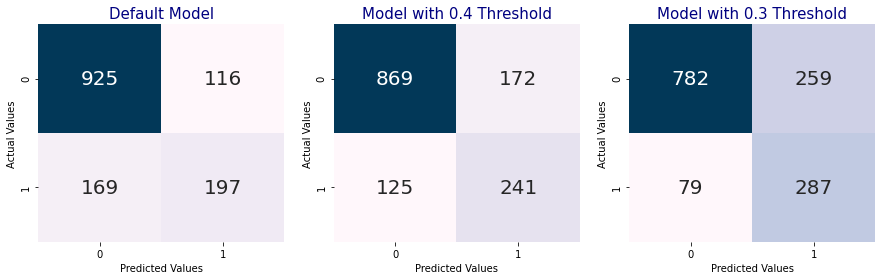

In [28]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Default Model', color='navy', fontsize=15)

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model with 0.4 Threshold', color='navy', fontsize=15)

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Model with 0.3 Threshold', color='navy', fontsize=15);

**If we decide to choose 0.3 as the model's threshold, the company would only loose 79 customers instead of 169, and it would offer 259 customers who wouldn't choose to churn at all.**

**For the scenario of this study, I am going to choose the 0.3 threshold. Because my imaginary client thinks the company would earn more profit by decreasing the number of the customers who are going to churn than offering discounts or offers to more customers.**